# **imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


# **functions**

In [2]:
def before_decompose(data):
  data=data[['TrafficVolume','day','hour']]
  data=data.groupby(['day','hour'],as_index=False).sum()

  y = data['TrafficVolume']
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='hour')
  # ax.plot(y.resample('D', level=0).sum(),marker='o', markersize=8, linestyle='-', label='Daily sum Resample')
  ax.set_ylabel('TrafficVolume')
  ax.legend();
  return y




# graphs to show seasonal_decompose
def seasonal_decompose (y,period):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq',period=period)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

def test_arima(X,y,order):
  predictions = list()
  history=[x for x in X['RSRP']]
  for t in range(len(y)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = y[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))
  # evaluate forecasts
  rmse = sqrt(mean_squared_error(y, predictions))
  print('Test RMSE: %.3f' % rmse)
  # plot forecasts against actual outcomes
  plt.plot(y)
  plt.plot(predictions, color='red')
  plt.show()

# **read_data**

In [3]:
data = pd.read_csv('/content/data.csv').iloc[:,1:]
data_uplink=data[data['TrafficDirection']=='Uplink']
data_downlink=data[data['TrafficDirection']=='Downlink']

In [4]:
# data_uplink.head()
# data_downlink.head()

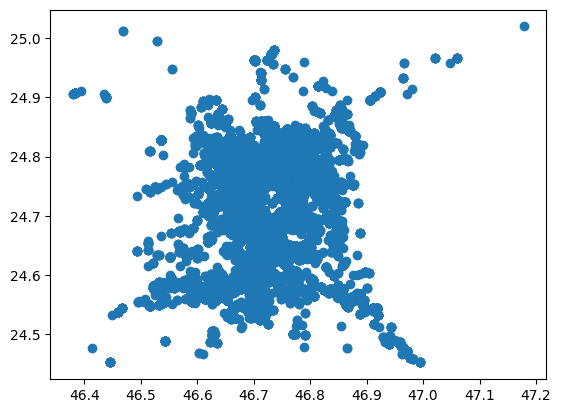

In [5]:
plt.scatter(data_uplink['LocationLongitude'],data_uplink['LocationLatitude'])


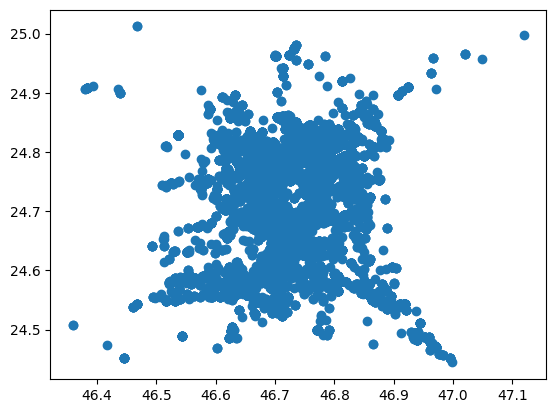

In [6]:
plt.scatter(data_downlink['LocationLongitude'],data_downlink['LocationLatitude'])

# **select_data**

In [7]:
#select 10km * 10km

In [8]:
import geopy.distance

x_1=24.6
x_2=24.8
y_1=46.65
y_2=46.85

coords_1 = (y_1,x_1)
coords_2 = (y_2, x_2)

print(geopy.distance.geodesic(coords_1, coords_2).km)

26.97875811339741


In [9]:
data_uplink=data_uplink[(data_uplink['LocationLatitude']>=x_1) & (data_uplink['LocationLatitude']<=x_2)
& (data_uplink['LocationLongitude']>=y_1) & (data_uplink['LocationLongitude']<=y_2)]

U_A=data_uplink[data_uplink['RadioOperatorName']=='Operator A']
U_B=data_uplink[data_uplink['RadioOperatorName']=='Operator B']
U_C=data_uplink[data_uplink['RadioOperatorName']=='Operator C']

data_downlink=data_downlink[(data_downlink['LocationLatitude']>=x_1) & (data_downlink['LocationLatitude']<=x_2)
& (data_downlink['LocationLongitude']>=y_1) & (data_downlink['LocationLongitude']<=y_2)]

D_A=data_downlink[data_downlink['RadioOperatorName']=='Operator A']
D_B=data_downlink[data_downlink['RadioOperatorName']=='Operator B']
D_C=data_downlink[data_downlink['RadioOperatorName']=='Operator C']

In [10]:
# plt.scatter(data_uplink['TrafficVolume'],data_uplink["RSRP"])
# plt.scatter(U_A['TrafficVolume'],U_A["RSRP"])
# plt.scatter(U_B['TrafficVolume'],U_B["RSRP"])
# plt.scatter(U_C['TrafficVolume'],U_C["RSRP"])


# plt.scatter(data_downlink['TrafficVolume'],data_downlink["RSRP"])
# plt.scatter(D_A['TrafficVolume'],D_A["RSRP"])
# plt.scatter(D_B['TrafficVolume'],D_B["RSRP"])
# plt.scatter(D_C['TrafficVolume'],D_C["RSRP"])

# **model**

# **Linear Regression Python**

# **Split Data**

Coefficients:  [0.         0.00725989]
Variance score: -0.000818783843153259


Text(0, 0.5, 'TrafficVolume')

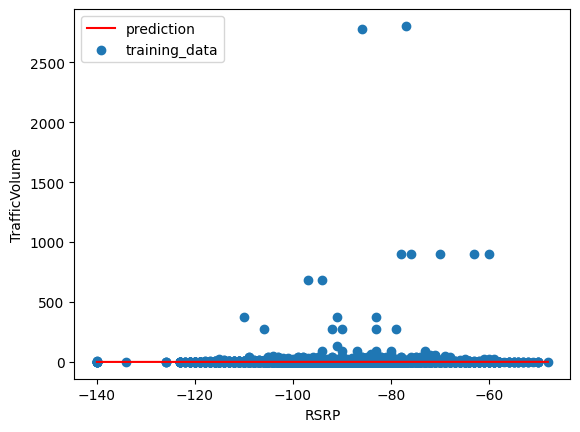

In [11]:
data_uplink.insert(1,"ones",1)
X=data_uplink[['ones','TrafficVolume']]
y=data_uplink["RSRP"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))
var = np.linspace(data_uplink.RSRP.min(),data_uplink.RSRP.max(),100) # min  max    separate 100 parts
line = reg.coef_[0]+reg.coef_[1]*var

fig, ax = plt.subplots()
ax.plot(var , line , 'r', label="prediction") # r red
ax.scatter(data_uplink.RSRP,data_uplink.TrafficVolume, label="training_data")
ax.legend(loc=2)
ax.set_xlabel("RSRP")
ax.set_ylabel("TrafficVolume")

Coefficients:  [ 0.         -0.00049668]
Variance score: -0.03264292715655359


Text(0, 0.5, 'TrafficVolume')

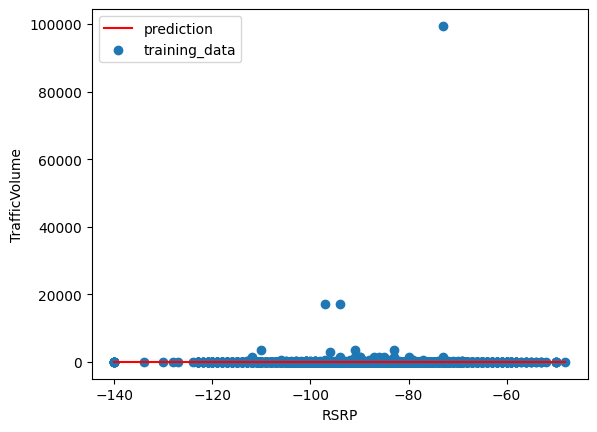

In [12]:
data_downlink.insert(1,"ones",1)
X=data_downlink[['ones','TrafficVolume']]
y=data_downlink["RSRP"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))
var = np.linspace(data_downlink.RSRP.min(),data_downlink.RSRP.max(),100) # min  max    separate 100 parts
line = reg.coef_[0]+reg.coef_[1]*var

fig, ax = plt.subplots()
ax.plot(var , line , 'r', label="prediction") # r red
ax.scatter(data_downlink.RSRP,data_downlink.TrafficVolume, label="training_data")
ax.legend(loc=2)
ax.set_xlabel("RSRP")
ax.set_ylabel("TrafficVolume")

# **Time series part**

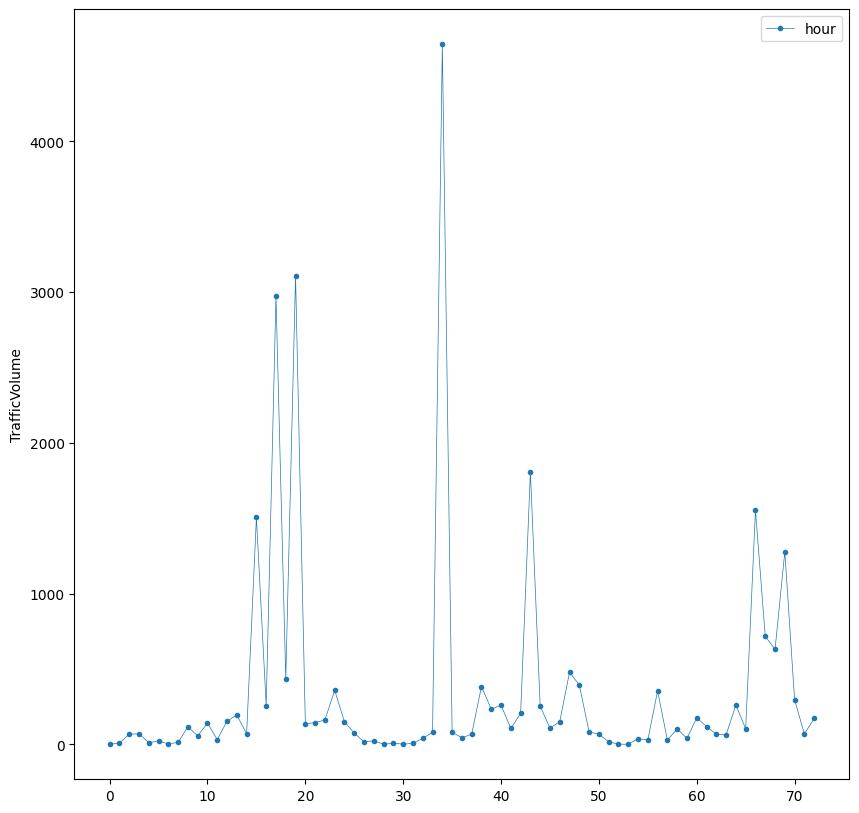

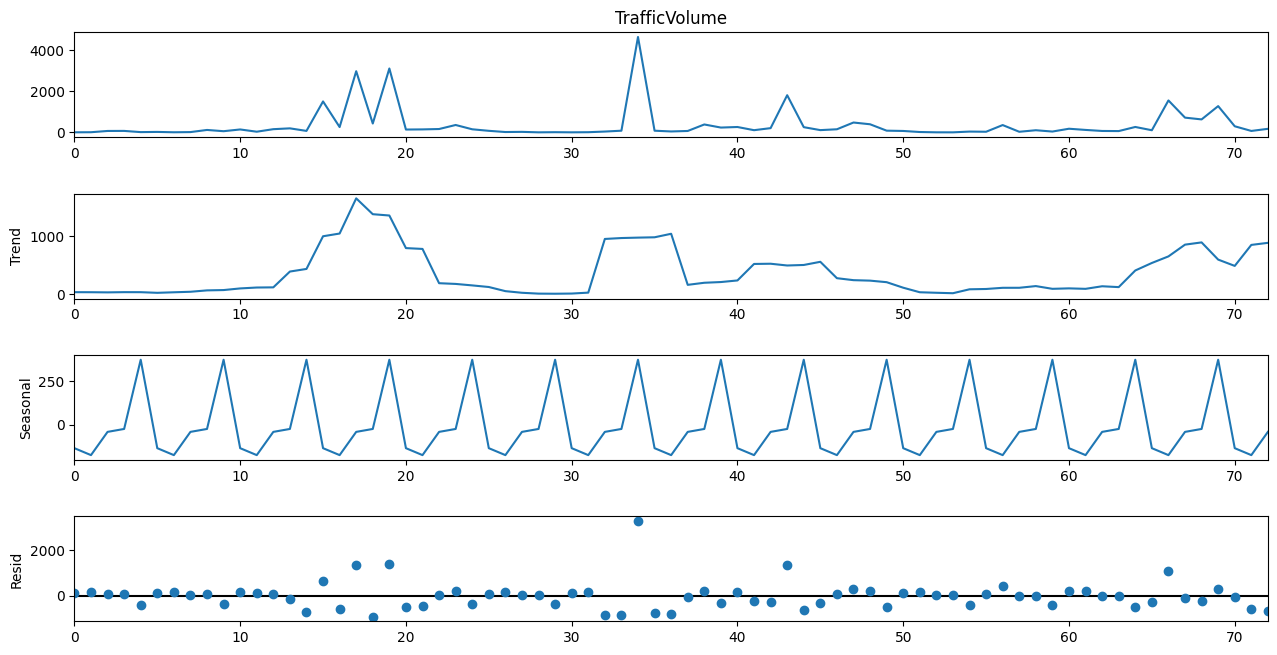

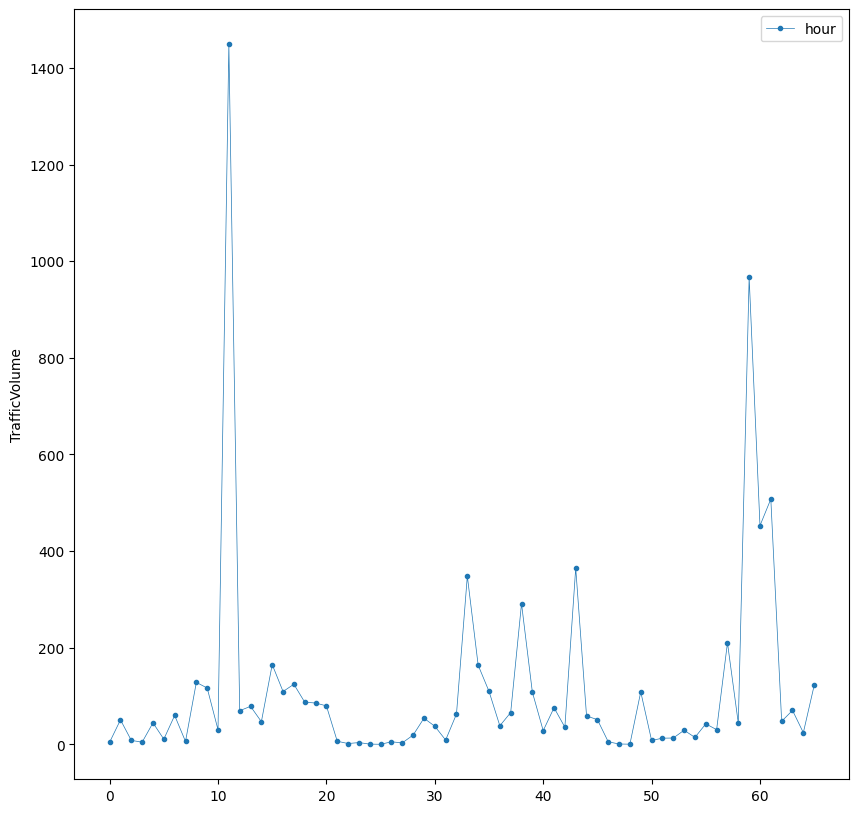

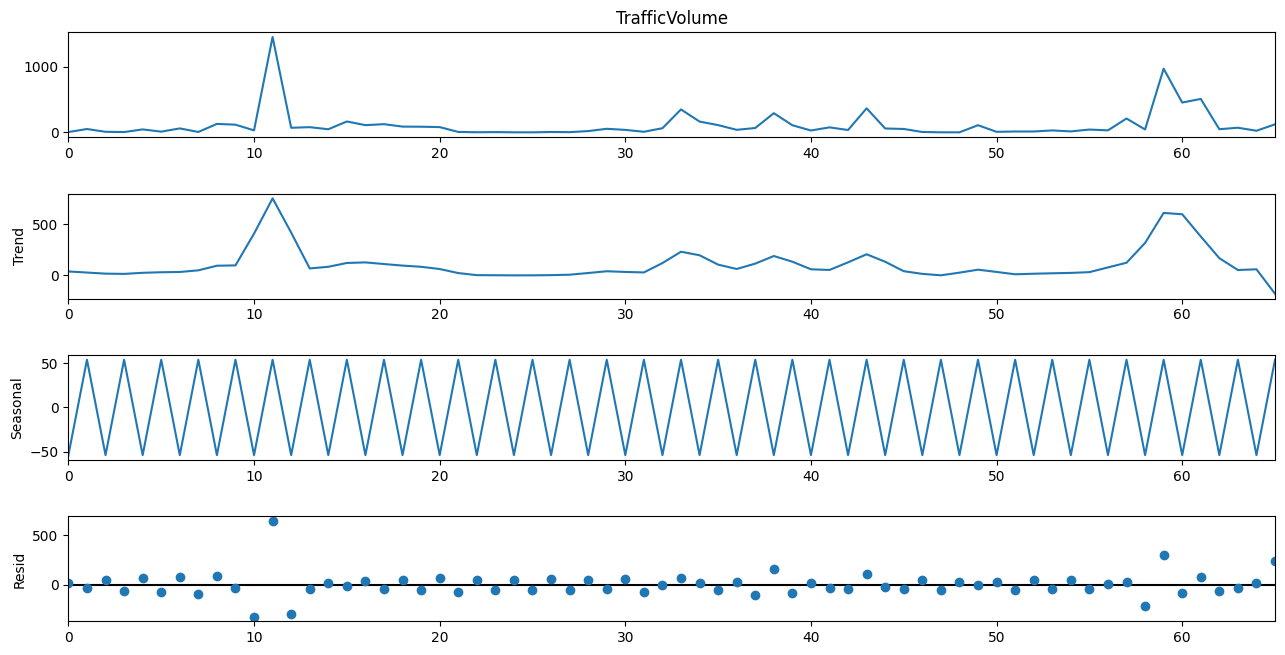

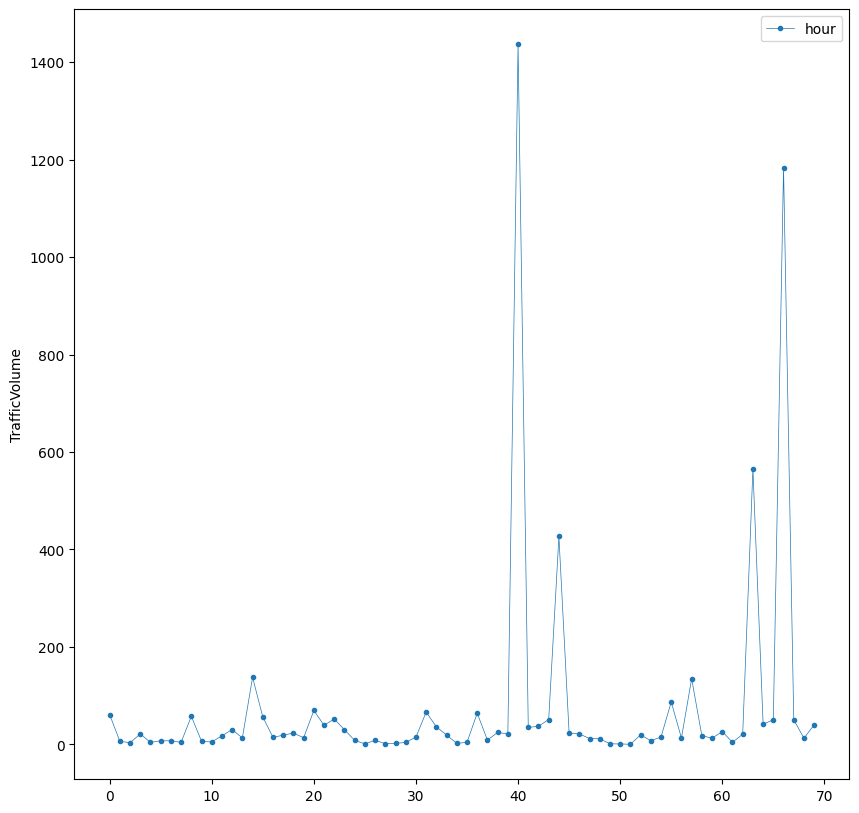

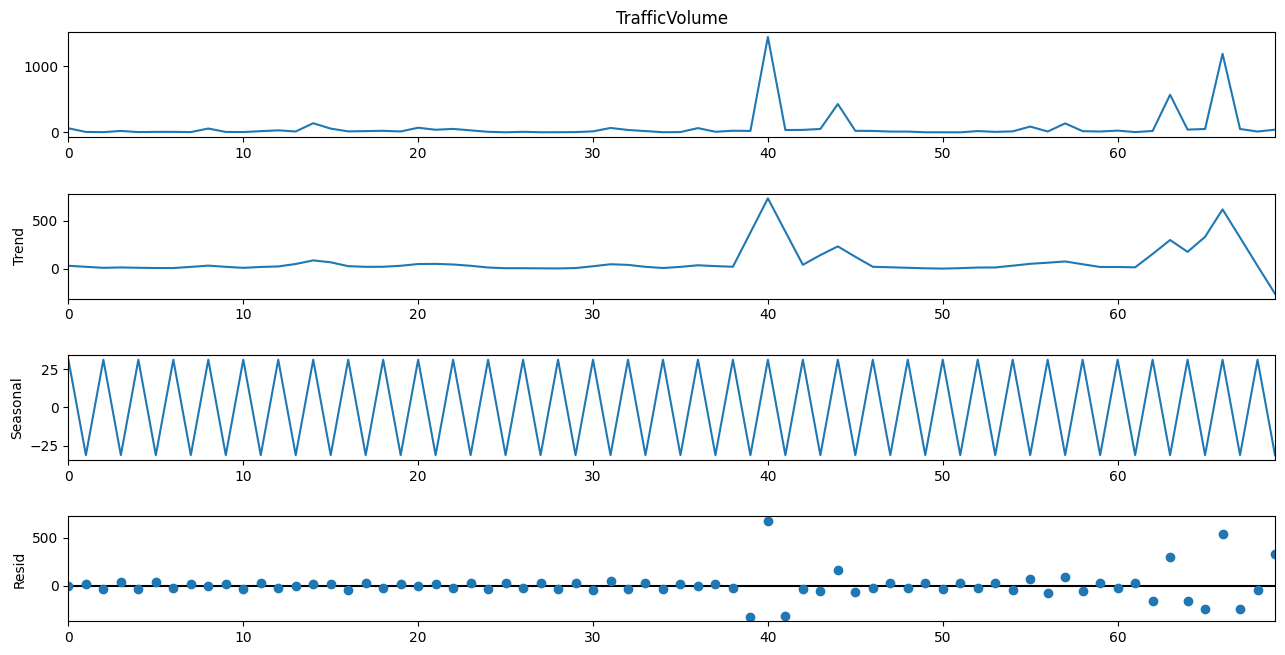

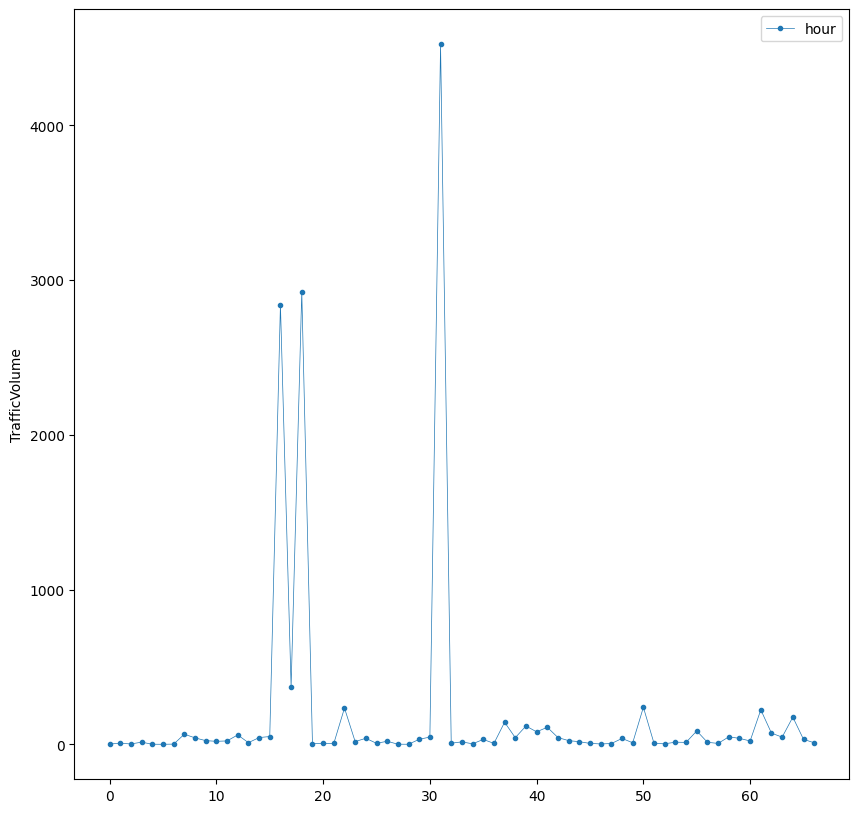

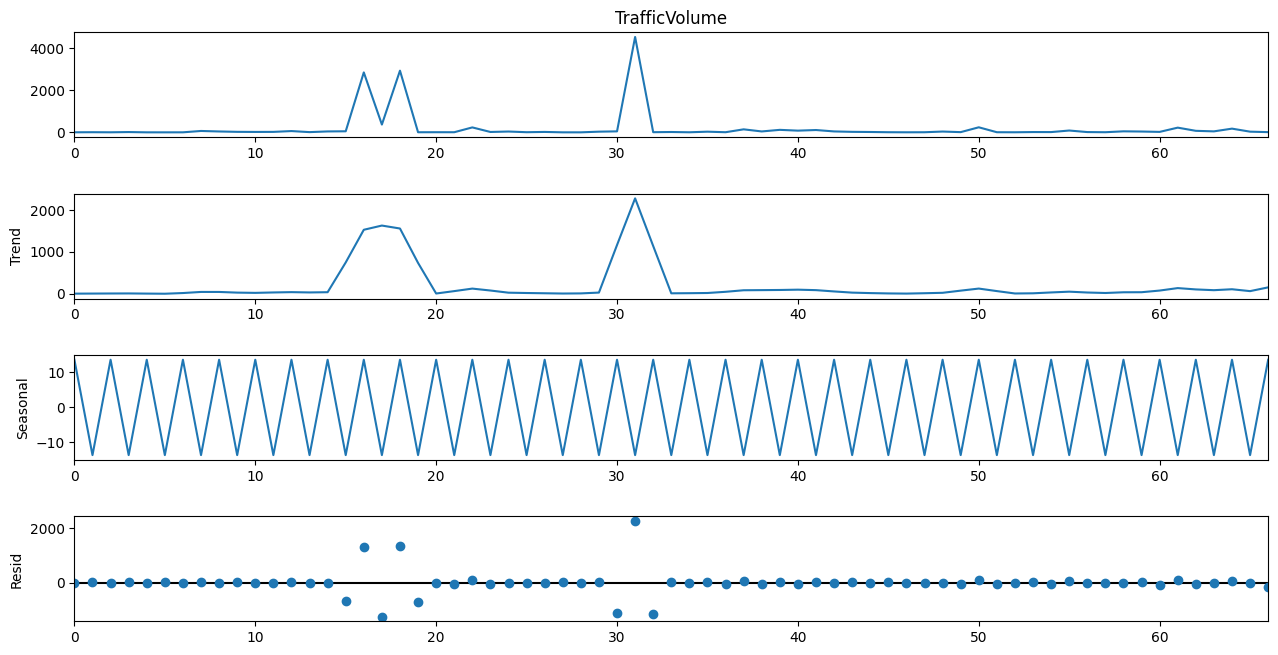

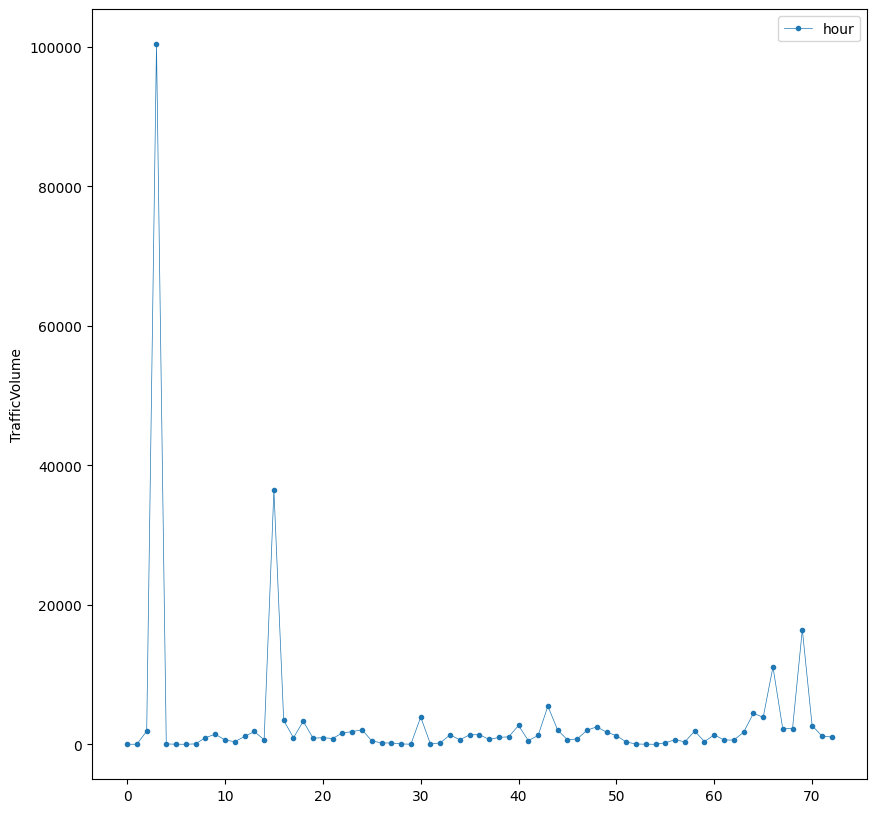

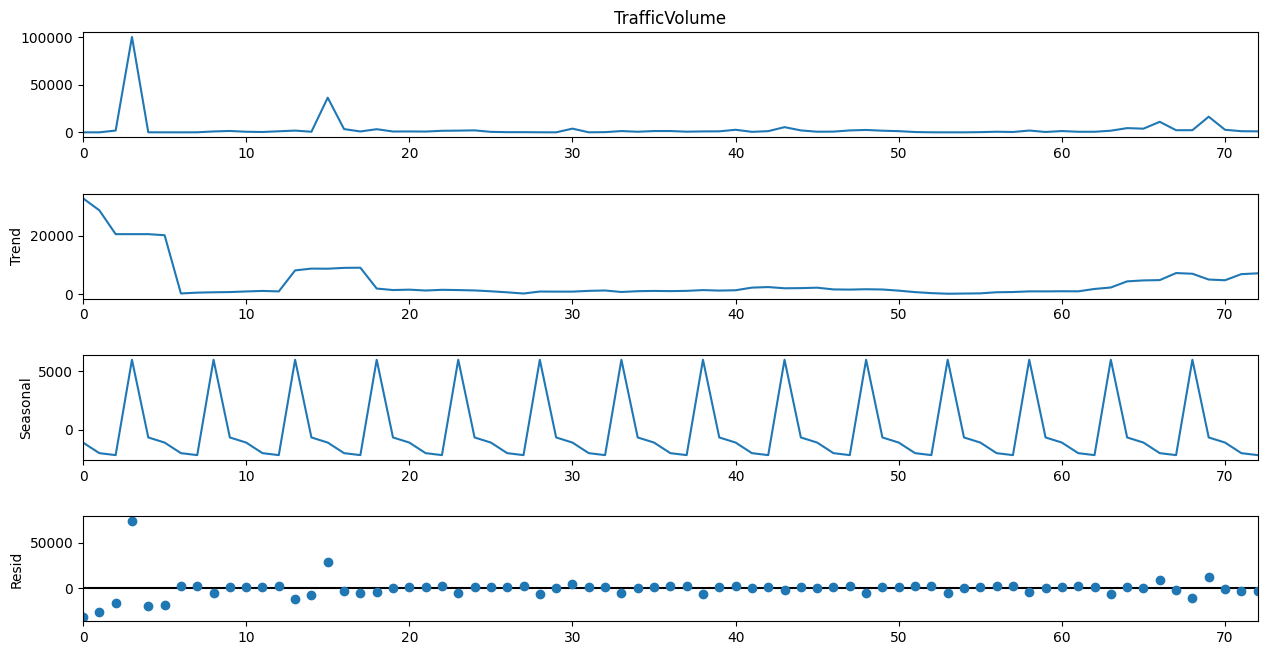

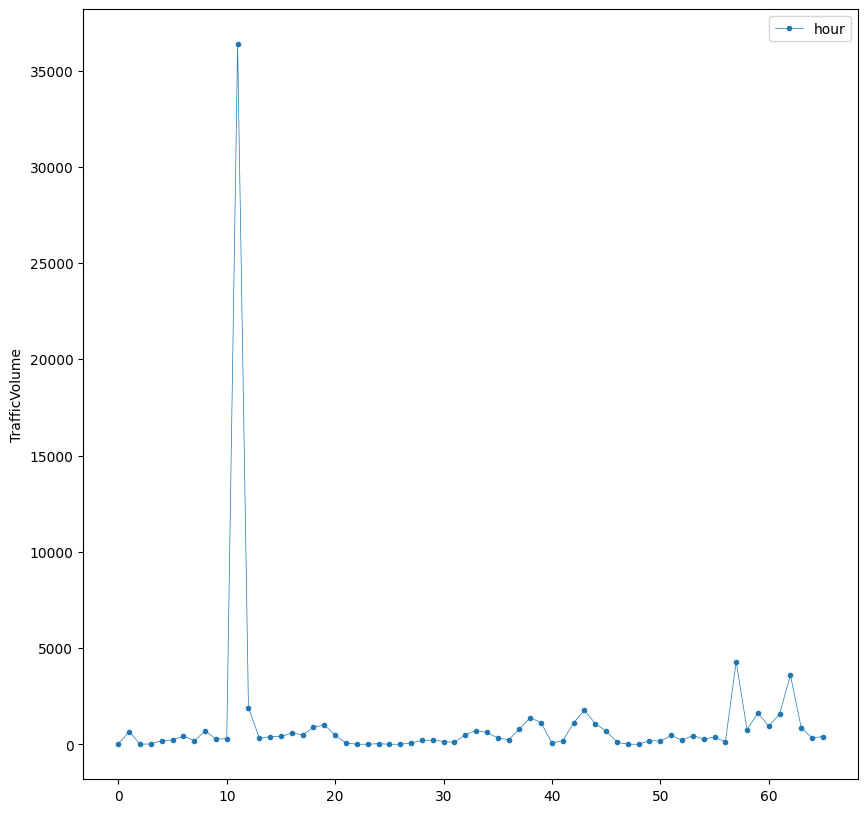

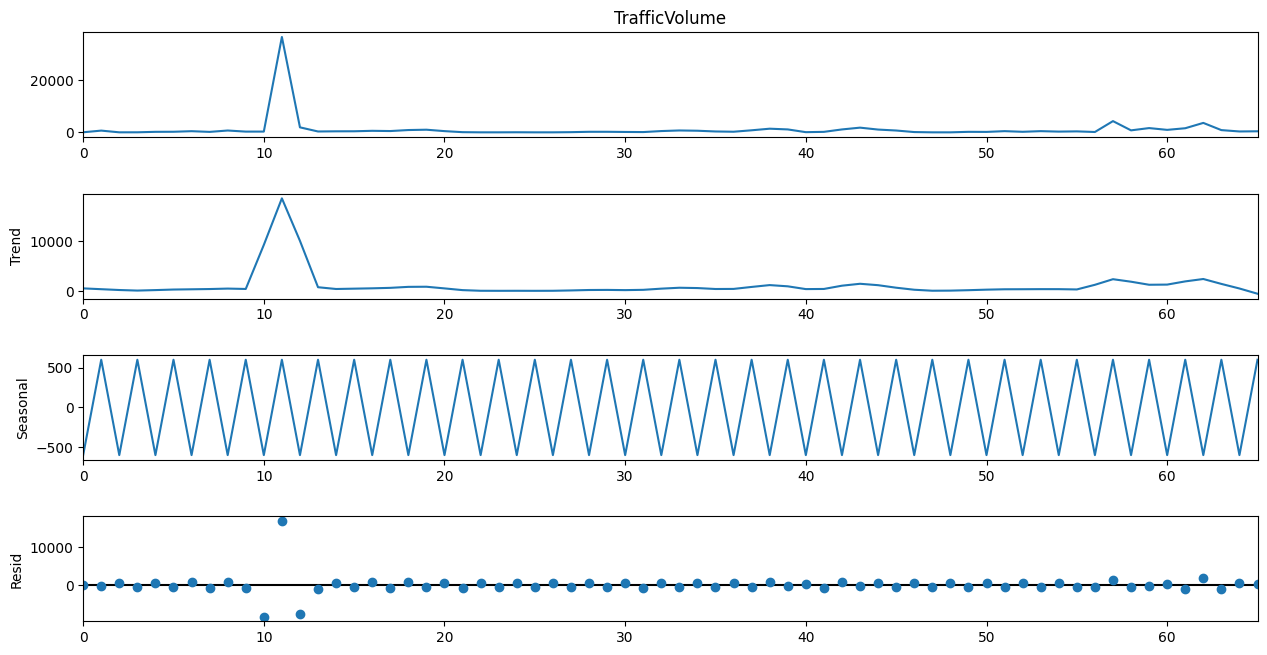

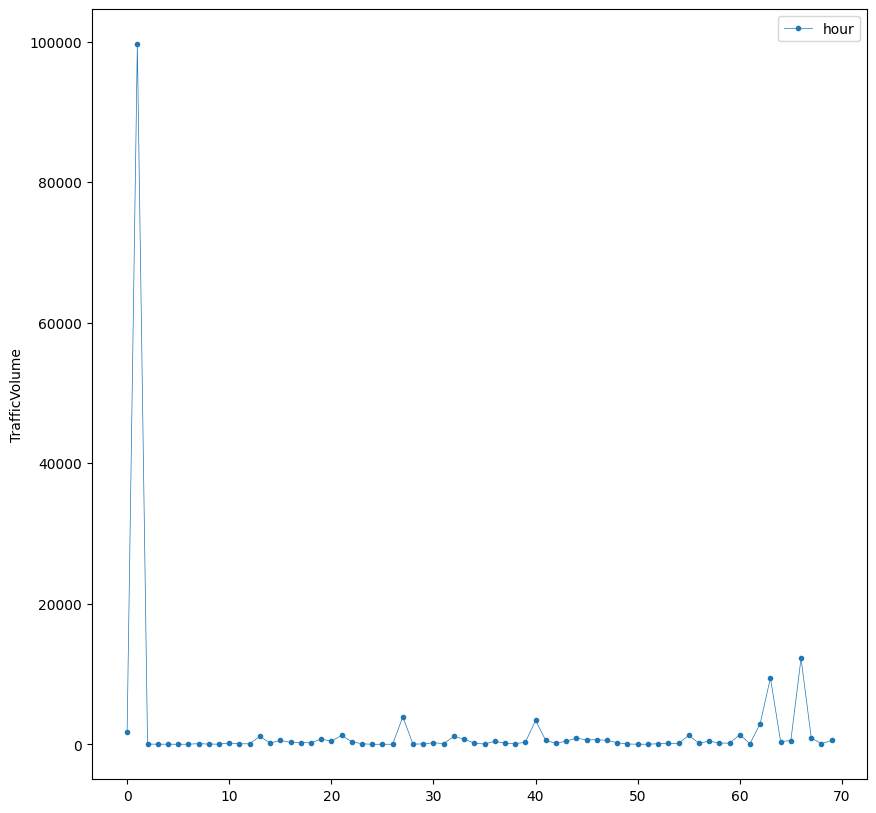

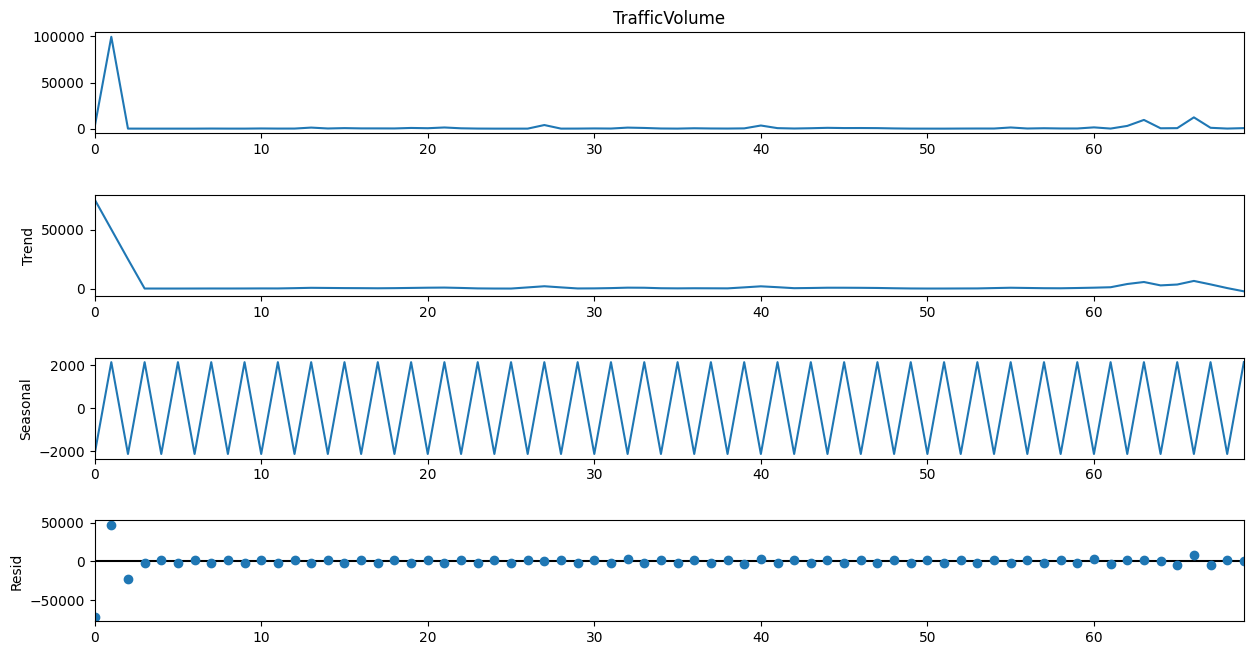

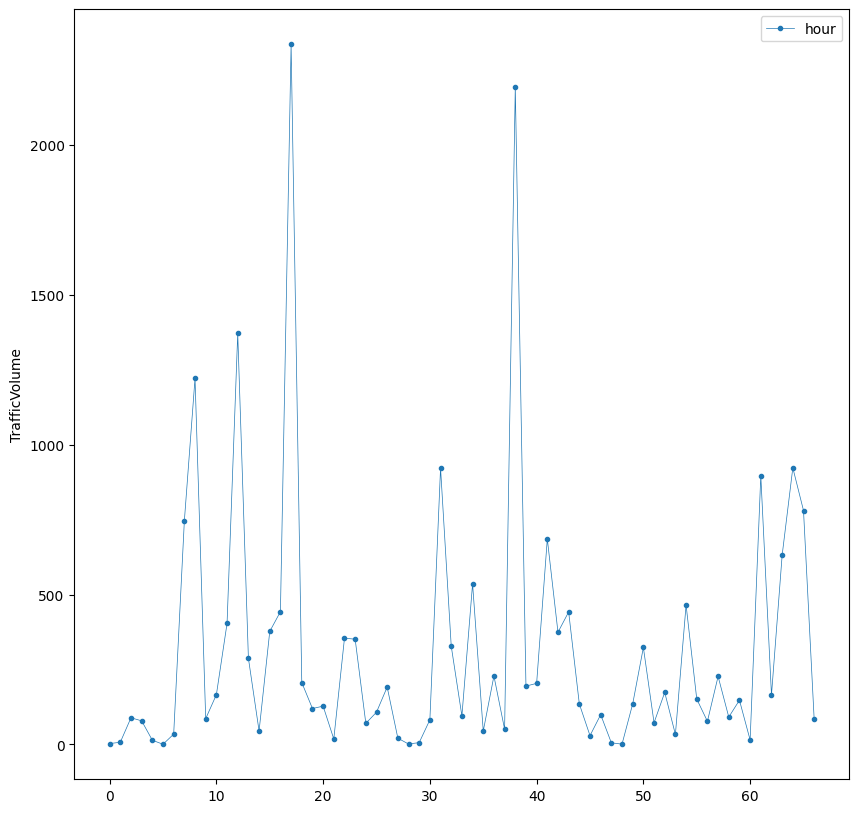

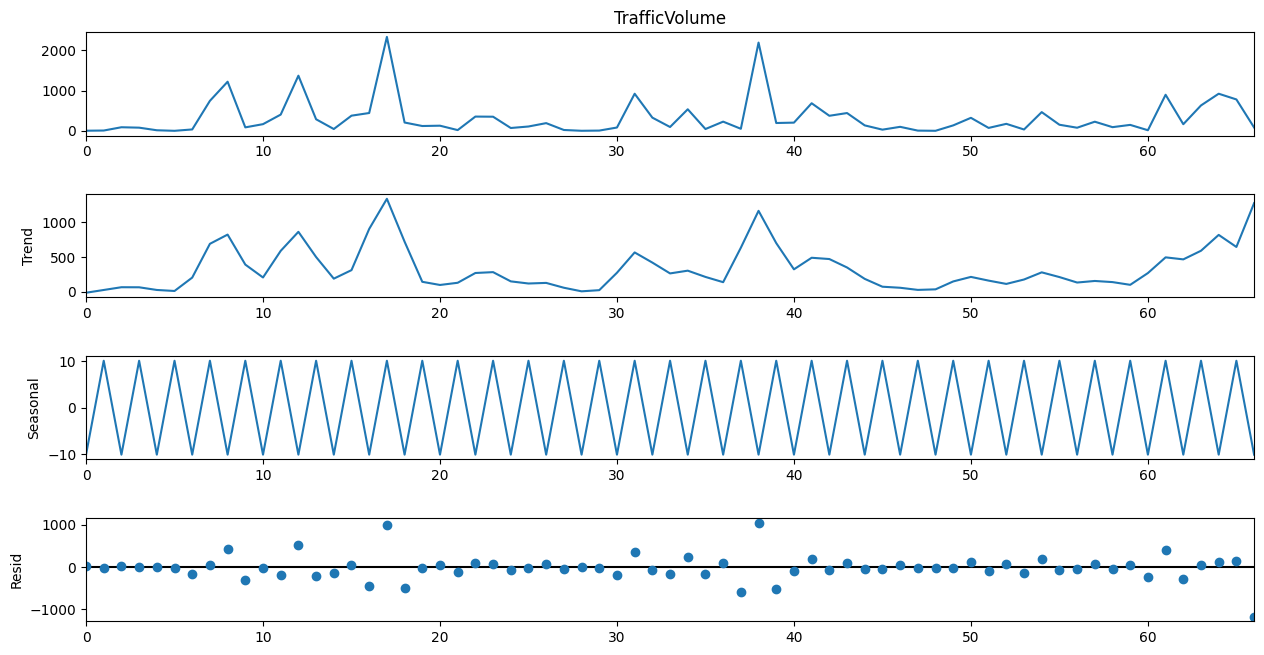

In [13]:
y_uplink=before_decompose(data_uplink)
seasonal_decompose(y_uplink,5)

y_UA=before_decompose(U_A)
seasonal_decompose(y_UA,2)

y_UB=before_decompose(U_B)
seasonal_decompose(y_UB,2)

y_UC=before_decompose(U_C)
seasonal_decompose(y_UC,2)

y_downlink=before_decompose(data_downlink)
seasonal_decompose(y_downlink,5)

y_DA=before_decompose(D_A)
seasonal_decompose(y_DA,2)

y_DB=before_decompose(D_B)
seasonal_decompose(y_DB,2)

y_DC=before_decompose(D_C)
seasonal_decompose(y_DC,2)

# **ARIMA**
# AR  Autoregressive  p how many take items before x of t
# I integrated AR and MA
# d is how many take diffrence of the signal
# MA  moving average  q how many take errors before x of t


# **acf for Q**

In [14]:
# plot_acf(data_uplink['RSRP']) # 2
# plot_acf(U_A['RSRP']) #3
# plot_acf(U_B['RSRP']) #2
# plot_acf(U_C['RSRP']) #5

# plot_acf(data_downlink['RSRP']) # 3
# plot_acf(D_A['RSRP']) # 2
# plot_acf(D_B['RSRP']) # 2
# plot_acf(D_C['RSRP']) # 5


# **pacf for p**

In [15]:
# plot_pacf(data_uplink['RSRP']) # 2
# plot_pacf(U_A['RSRP']) #3
# plot_pacf(U_B['RSRP']) #2 #there are a problem
# plot_pacf(U_C['RSRP']) #5 #there are a problem

# plot_pacf(data_downlink['RSRP']) # 3
# plot_pacf(D_A['RSRP']) # 2
# plot_pacf(D_B['RSRP']) # 2 #there are a problem
# plot_pacf(D_C['RSRP']) # 5 #there are a problem

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Like

Test RMSE: 1006.703


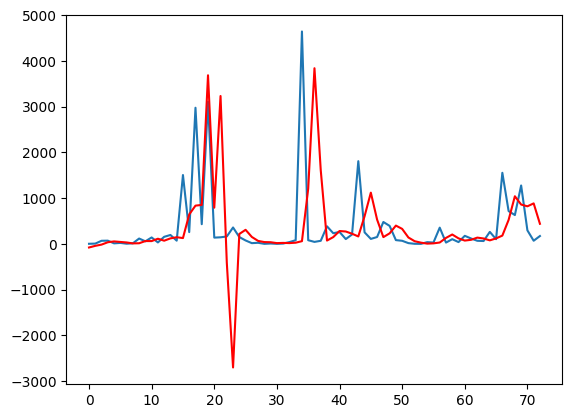

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Like

Test RMSE: 59440990.773


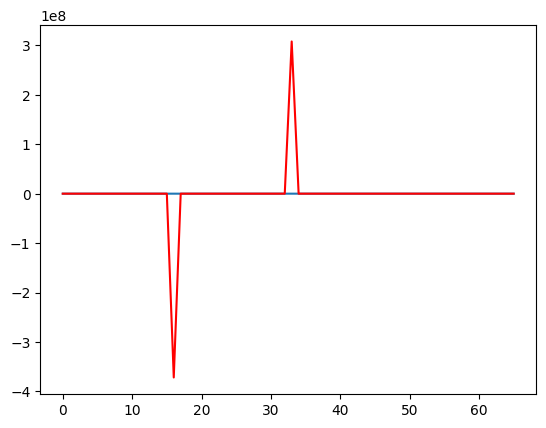

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 752.204


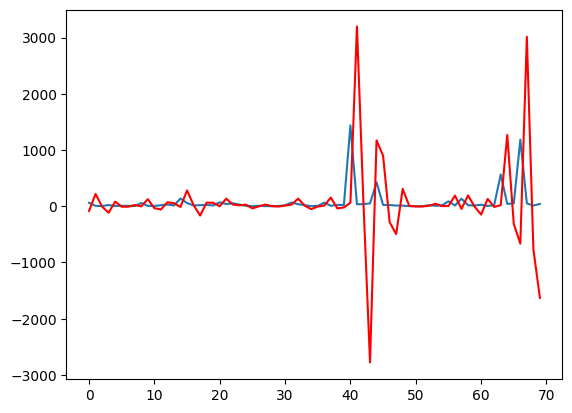

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: Conver

Test RMSE: 949.883


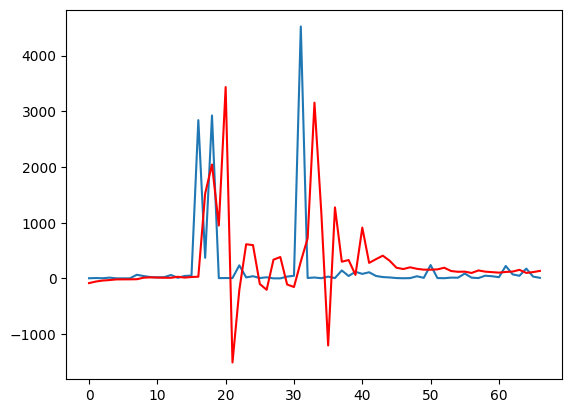

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 65978.483


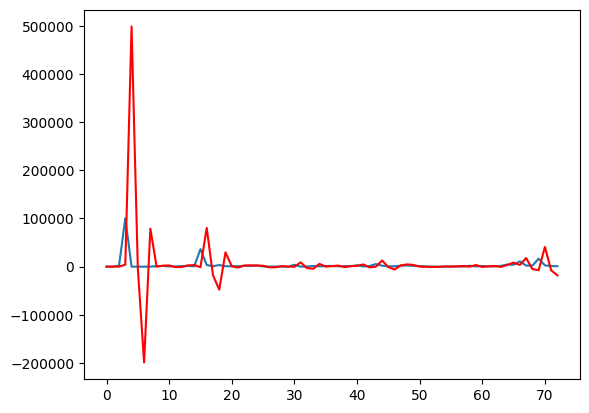

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: Conver

Test RMSE: 13059.682


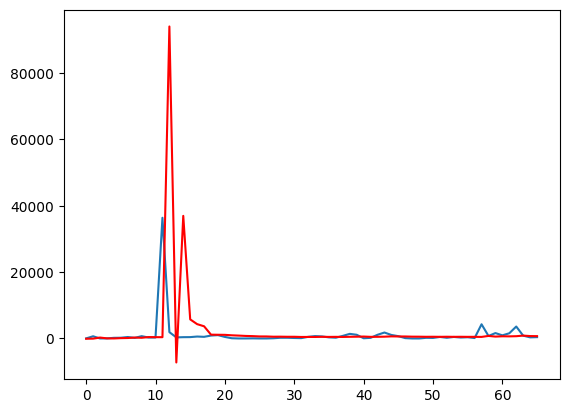

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 46891.632


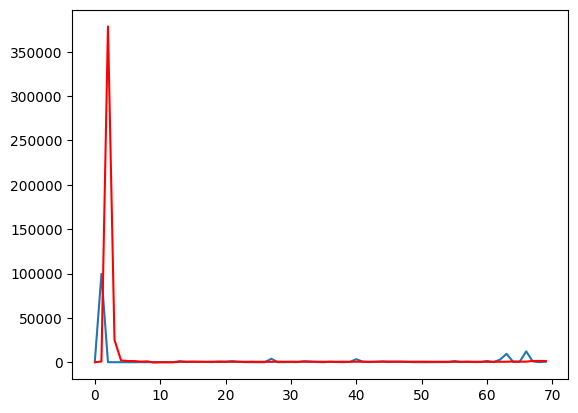

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

Test RMSE: 601.681


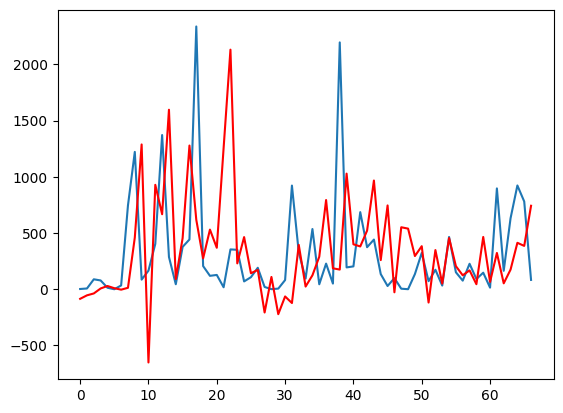

In [16]:
test_arima(data_uplink,y_uplink,(2,3,2))
test_arima(U_A,y_UA,(2,2,2))
test_arima(U_B,y_UB,(1,4,1))
test_arima(U_C,y_UC,(3,1,3))
test_arima(data_downlink,y_downlink,(1,4,1))
test_arima(D_A,y_DA,(2,1,2))
test_arima(D_B,y_DB,(1,1,2))
test_arima(D_C,y_DC,(5,1,5))
# 

In [17]:
# test_arima(D_C,y_DC,(6,1,6))

In [18]:
# https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one